In [5]:
!pip install fitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 57.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [1]:
!pip install numpy==1.23.5 --force-reinstall
!pip install pandas matplotlib fitter kagglehub --upgrade --force-reinstall

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached fitter-1.7.1-py3-none-any.whl.metadata (8.2 kB)
  Using cached kagglehub-0.3.11-py3-none-any.whl.metadata (32 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 5.9 MB/s eta 0:00:00
^C


   Unnamed: 0           location  price  bedrooms  bathrooms  garage  area
0           0            Zapopan  22300         3          4       2   180
1           1      Real Vallarta  12500         2          2       2   100
2           2   Puertas del Tule  25000         4          4       2   187
3           3            Zapopan  58000         3          4       4   700
4           4  Heroes Nacionales   9000         3          2       2   110


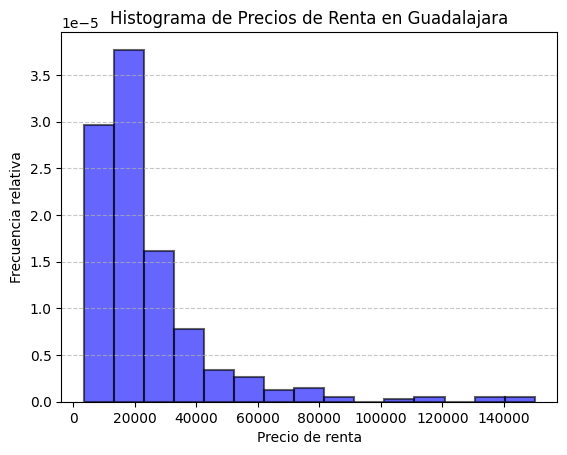

{'lognorm': {'s': 0.711809851938693, 'loc': 1946.3336155692652, 'scale': 17072.009962982756}}


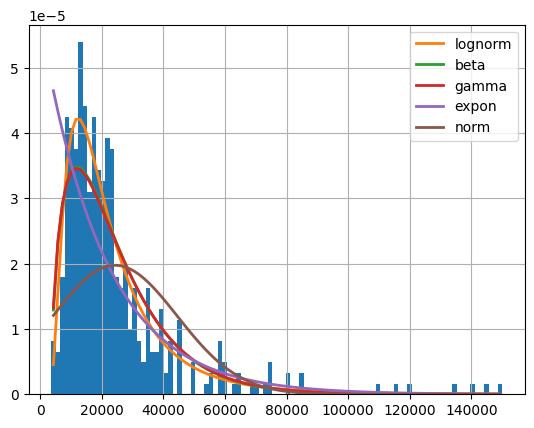

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from fitter import Fitter
import kagglehub

# Cargar el dataset
path = kagglehub.dataset_download("robertrmz/guadalajara-rent-prices")
file_path = os.path.join(path, "data_updated.csv")
df = pd.read_csv(file_path)
print(df.head())

# Asegurarse de que los datos sean numéricos y quitar nulls
df_filtered = df['price'].dropna()
df_filtered = pd.to_numeric(df_filtered, errors='coerce').dropna()

# Graficar el histograma de los precios de renta
plt.hist(df_filtered, bins=15, density=True, alpha=0.6, color='b', edgecolor='black', linewidth=1.5)
plt.xlabel("Precio de renta")
plt.ylabel("Frecuencia relativa")
plt.title("Histograma de Precios de Renta en Guadalajara")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Ajuste de distribuciones utilizando Fitter
f = Fitter(df_filtered, distributions=['norm', 'expon', 'lognorm', 'gamma', 'beta'])
f.fit()

# Resumen de los resultados del ajuste
f.summary()
print(f.get_best())